# D208- Predictive Modeling
___
## Performance Assessment - Task 1: Multiple Regression for Predictive Modeling
### Medical Readmission Data Set (Clean)
---
<br></br>

## Part I

### A1: Research Question

### A2: Objectives and Goals

## Part II

### B1: Summary of Assumptions

### B2: Tool Benefits

### B3: Appropriate Technique

## Part III

### C1: Data Goals

### C2: Summary Statistics

### C3: Steps to Prepare the Data

### C4: Visualizations

### C5: Prepared Data Set

## Part IV

### D1: Initial Model

### D2: Justification of Model Reduction

### D3: Reduced Multiple Regression Model

## Part V

### E1: Model Comparison

### E2: Output and Calculations

### E3: Code

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
df = pd.read_csv('./data/jaybob.csv')

In [3]:
df.head()

,Car ID,Price,Odometer,Age,Pink slip,Sold?
0,1,"$1,000",30.298,28,1,1
1,2,"$9,000",19.647,40,1,0
2,3,$500,170.270,58,0,1
3,4,"$3,000",68.394,12,1,1
4,5,"$9,500",11.662,3,0,0


In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.Price = df.Price.str.replace('$', '')
df.Price = df.Price.str.replace(',', '')

df.head()

/var/folders/3d/md104nbx6j195mdyz_lnwl140000gn/T/ipykernel_26657/3179587834.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Price = df.Price.str.replace('$', '')


,Car ID,Price,Odometer,Age,Pink slip,Sold?
0,1,1000,30.298,28,1,1
1,2,9000,19.647,40,1,0
2,3,500,170.270,58,0,1
3,4,3000,68.394,12,1,1
4,5,9500,11.662,3,0,0


In [6]:
df.Price = df.Price.astype('float64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Car ID     100 non-null    int64  
 1   Price      100 non-null    float64
 2   Odometer   100 non-null    float64
 3   Age        100 non-null    int64  
 4   Pink slip  100 non-null    int64  
 5   Sold?      100 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 4.8 KB


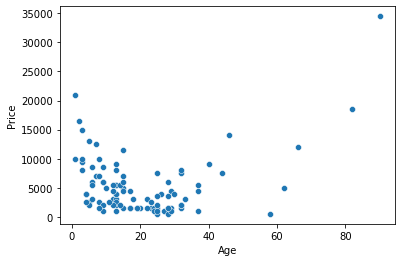

In [8]:

sns.scatterplot(x='Age', y='Price', data=df)
plt.show()

<AxesSubplot:xlabel='Odometer', ylabel='Price'>

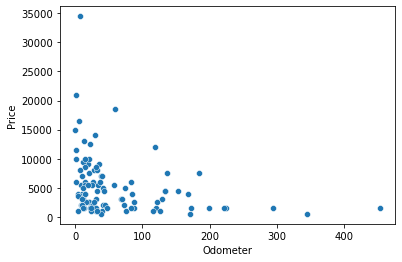

In [9]:
sns.scatterplot(x='Odometer', y='Price', data=df)

In [10]:
results = smf.ols('Price ~ Age + Odometer', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     9.980
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           0.000114
Time:                        18:58:05   Log-Likelihood:                -985.48
No. Observations:                 100   AIC:                             1977.
Df Residuals:                      97   BIC:                             1985.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4615.9004    792.153      5.827      0.0

In [11]:
# square age and invert odometer
df['Age2'] = df.Age ** 2
df['OdometerInv'] = df.Odometer.rdiv(1)

In [12]:
results = smf.ols('Price ~ Age + Age2 + OdometerInv', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     45.13
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           2.78e-18
Time:                        18:58:06   Log-Likelihood:                -950.85
No. Observations:                 100   AIC:                             1910.
Df Residuals:                      96   BIC:                             1920.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8809.0342    806.828     10.918      

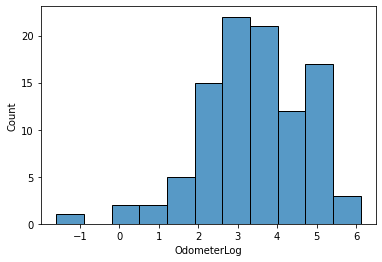

In [13]:
# log odometer
df['OdometerLog'] = np.log(df.Odometer)
sns.histplot(x='OdometerLog', data=df)
plt.show()

In [14]:
results = smf.ols('Price ~ Age + Age2 + OdometerLog', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     50.66
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           1.02e-19
Time:                        18:58:08   Log-Likelihood:                -947.38
No. Observations:                 100   AIC:                             1903.
Df Residuals:                      96   BIC:                             1913.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.186e+04    940.977     12.607      

## Part VI

### F1: Results

### F2: Recommendations

### I: Sources
